<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/HR_current.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [108]:
import warnings

warnings.filterwarnings('ignore')

input

In [172]:
df = pd.read_csv("Current.csv")

exploratory

In [173]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        88 non-null     int64
 1   Problem Solving  88 non-null     int64
 2   Interaction      88 non-null     int64
 3   Impact           88 non-null     int64
 4   Accountability   88 non-null     int64
dtypes: int64(5)
memory usage: 3.6 KB


In [174]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,40,20,20,30,0
1,52,20,20,30,0
2,54,20,36,30,0
3,89,27,27,30,0
4,89,27,36,30,0


checks

In [175]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,88.000000,88.000000,88.000000,88.000000,88.000000
mean,120.761364,39.500000,44.556818,109.204545,0.238636
std,44.330004,18.680619,18.133514,43.020754,2.238608
min,40.000000,20.000000,20.000000,30.000000,0.000000
25%,89.000000,27.000000,27.000000,64.000000,0.000000
50%,118.000000,36.000000,36.000000,116.000000,0.000000
75%,148.000000,48.000000,49.750000,128.000000,0.000000
max,258.000000,117.000000,103.000000,213.000000,21.000000


In [176]:
X=df

Scaling

In [177]:
cols = X.columns

In [178]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [179]:
X = pd.DataFrame(X, columns=[cols])

In [180]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.000000,0.000000,0.000000,0.0,0.0
1,0.055046,0.000000,0.000000,0.0,0.0
2,0.064220,0.000000,0.192771,0.0,0.0
3,0.224771,0.072165,0.084337,0.0,0.0
4,0.224771,0.072165,0.192771,0.0,0.0


In [181]:
X.dropna(inplace=True)
X.shape

(88, 5)

K means

In [182]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [183]:
kmeans.cluster_centers_

array([[5.94801223e-01, 3.91408935e-01, 5.26506024e-01, 6.66484517e-01,
        3.33333333e-02],
       [2.54428978e-01, 1.02559545e-01, 1.76568342e-01, 3.11946486e-01,
        6.93889390e-18]])

inertia

In [184]:
kmeans.inertia_

7.904509068194665

Elbow

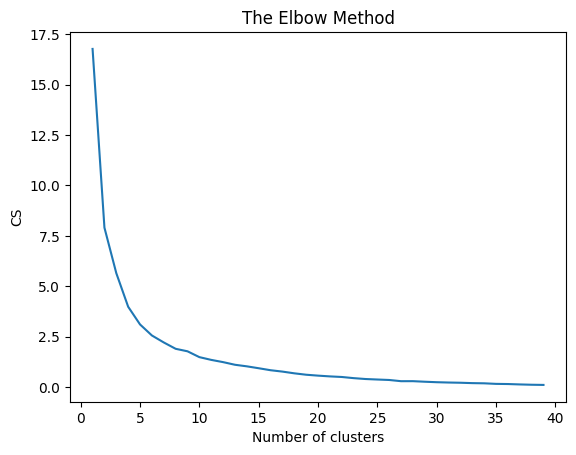

In [185]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

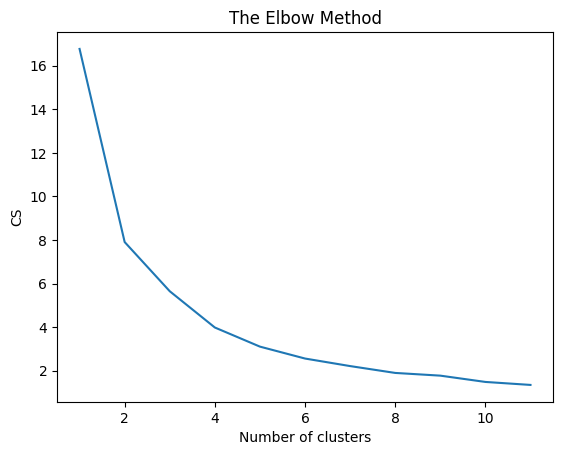

In [186]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [195]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [196]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('aut_hr_l.csv')
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0]


In [197]:
Z=kmeans.cluster_centers_
Z

array([[5.94801223e-01, 3.91408935e-01, 5.26506024e-01, 6.66484517e-01,
        3.33333333e-02],
       [2.54428978e-01, 1.02559545e-01, 1.76568342e-01, 3.11946486e-01,
        6.93889390e-18]])

In [198]:
import matplotlib

In [199]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 87 nearest neighbors...
[t-SNE] Indexed 88 samples in 0.001s...
[t-SNE] Computed neighbors for 88 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 88 / 88
[t-SNE] Mean sigma: 0.245019
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.932384
[t-SNE] KL divergence after 2500 iterations: -0.782447


In [200]:
np.unique(labels)


array([0, 1], dtype=int32)

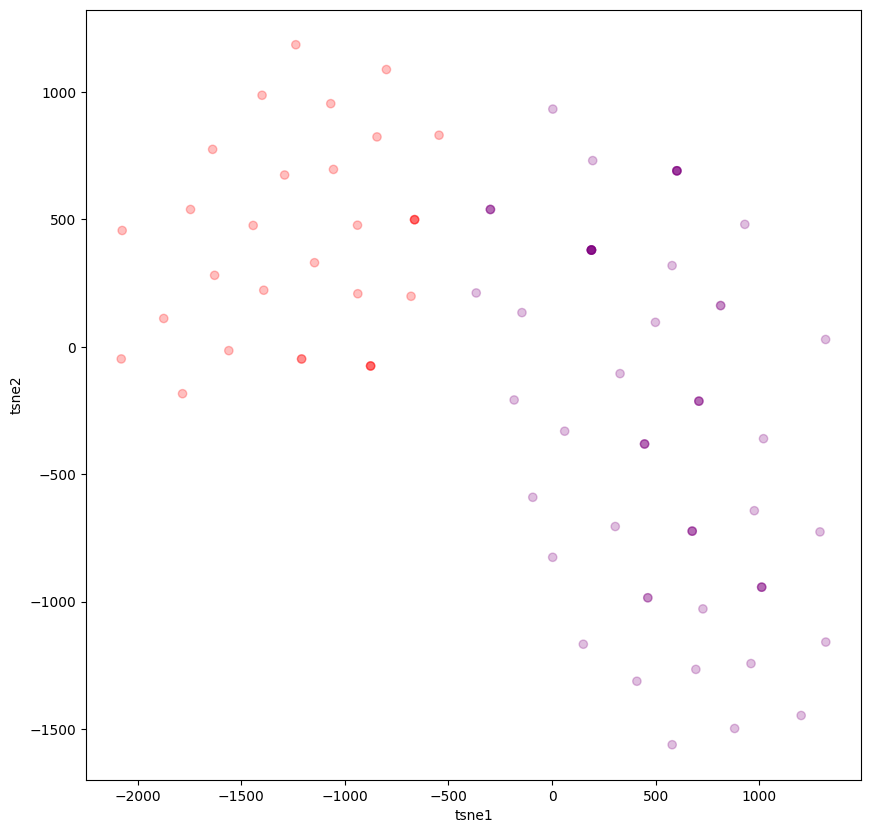

In [201]:
colors = ["red","green","blue","purple"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [202]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_hr_aut.csv')
Z2

array([[1.69666667e+02, 5.79666667e+01, 6.37000000e+01, 1.51966667e+02,
        7.00000000e-01],
       [9.54655172e+01, 2.99482759e+01, 3.46551724e+01, 8.70862069e+01,
        1.45716772e-16]])